In [2]:
import pandas as pd
df = pd.read_excel("Online_Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
import pandas as pd

# Load data
df = pd.read_excel("Online_Retail.xlsx", engine="openpyxl")

# Keep only required columns
df = df[['InvoiceDate', 'Quantity', 'UnitPrice']]

# Convert to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')

# Create Sales column
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Remove returns or negative sales
df = df[df['Sales'] > 0]

# Aggregate Daily sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum().reset_index()
daily_sales.columns = ['Date', 'Sales']
daily_sales['Date'] = pd.to_datetime(daily_sales['Date'])

daily_sales.head()


,Date,Sales
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46


In [4]:
daily_sales['day'] = daily_sales['Date'].dt.day
daily_sales['month'] = daily_sales['Date'].dt.month
daily_sales['year'] = daily_sales['Date'].dt.year
daily_sales['dayofweek'] = daily_sales['Date'].dt.dayofweek

X = daily_sales[['day', 'month', 'year', 'dayofweek']]
y = daily_sales['Sales']


In [5]:
split = int(len(daily_sales) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]
y_train = y.iloc[:split]
y_test  = y.iloc[split:]


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 21136.665145062325
RMSE: 31284.47031189661


In [8]:
import pandas as pd

future_dates = pd.date_range(
    start=daily_sales['Date'].max() + pd.Timedelta(days=1),
    periods=30
)

future_df = pd.DataFrame({'Date': future_dates})
future_df['day'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['year'] = future_df['Date'].dt.year
future_df['dayofweek'] = future_df['Date'].dt.dayofweek

future_X = future_df[['day', 'month', 'year', 'dayofweek']]
future_df['Predicted Sales'] = model.predict(future_X)

future_df.head()


,Date,day,month,year,dayofweek,Predicted Sales
0,2011-12-10,10,12,2011,5,30861.604267
1,2011-12-11,11,12,2011,6,27887.901996
2,2011-12-12,12,12,2011,0,45689.127360
3,2011-12-13,13,12,2011,1,42715.425089
4,2011-12-14,14,12,2011,2,39741.722819


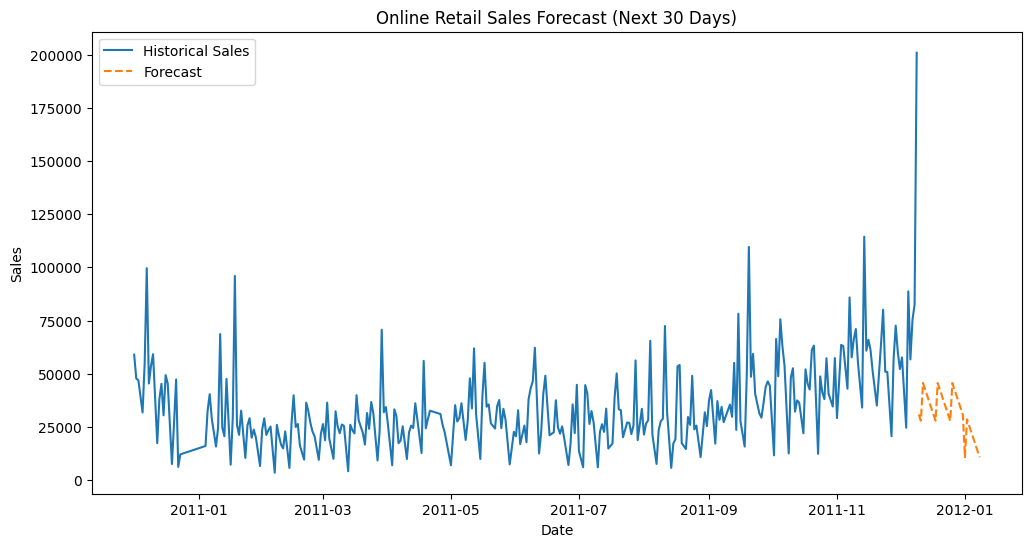

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Historical Sales')
plt.plot(future_df['Date'], future_df['Predicted Sales'], label='Forecast', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Online Retail Sales Forecast (Next 30 Days)")
plt.legend()
plt.show()
